### Geração de dados sintéticos

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 1. Gerando os dados sintéticos
np.random.seed(42)
X = np.random.rand(300, 1) * 10 # Valores entre 0 e 10
y = 10 + 2 * X + 3 * X**2 + np.random.normal(0, 100, size=(300, 1)) # Relação não-linear com ruído

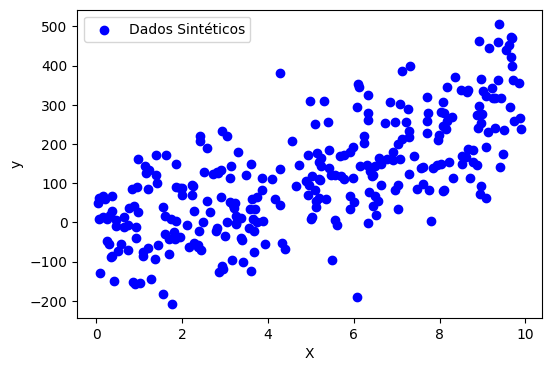

In [19]:
# Visualizando os dados
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Dados Sintéticos')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Divisão dos dados em treino e teste

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Treinaremos:
- Modelo linear simples (y = ax + b)
- Modelo polinomial de grau 2 (captura a estrutura correta, y = a + bx + cx^2)
- Modelo polinomial de grau 10 (muito complexo para o problema)

Polinômio de grau:  1


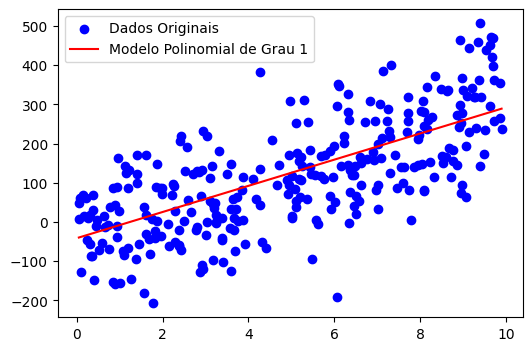

Mean Squared Error (MSE) teste data: 6536.40
Mean Squared Error (MSE) train data: 11012.23
R² Score: 0.6253654225289413


Polinômio de grau:  2


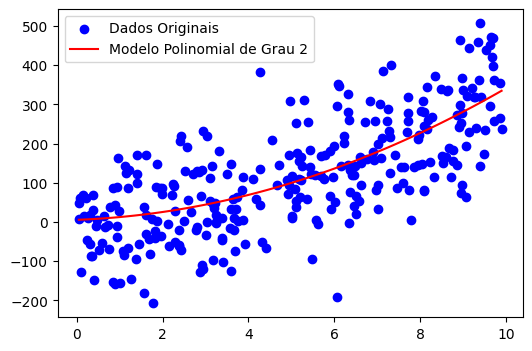

Mean Squared Error (MSE) teste data: 6664.37
Mean Squared Error (MSE) train data: 10522.95
R² Score: 0.6180311895300417


Polinômio de grau:  3


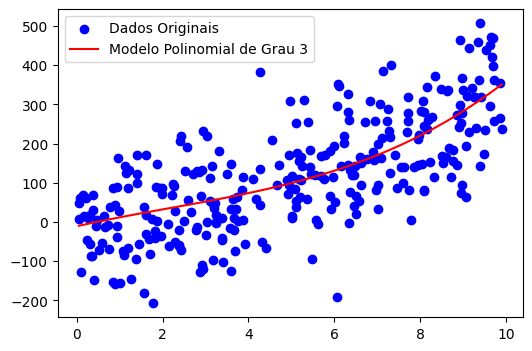

Mean Squared Error (MSE) teste data: 6812.93
Mean Squared Error (MSE) train data: 10477.89
R² Score: 0.6095161172814212


Polinômio de grau:  4


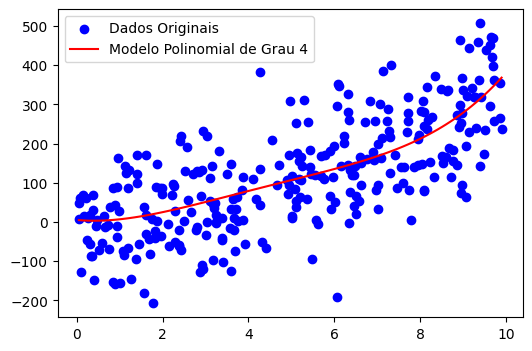

Mean Squared Error (MSE) teste data: 6714.40
Mean Squared Error (MSE) train data: 10440.50
R² Score: 0.6151635015167949


Polinômio de grau:  5


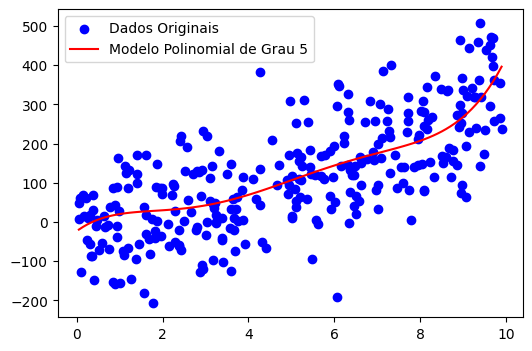

Mean Squared Error (MSE) teste data: 6923.15
Mean Squared Error (MSE) train data: 10352.33
R² Score: 0.6031988499320609


Polinômio de grau:  6


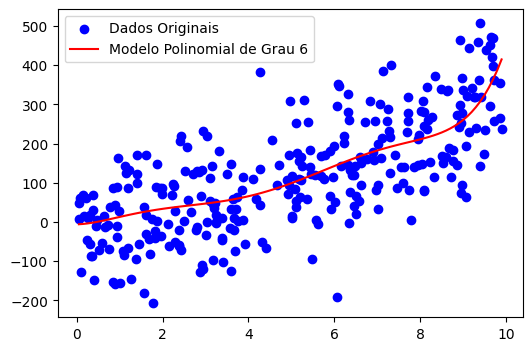

Mean Squared Error (MSE) teste data: 7061.44
Mean Squared Error (MSE) train data: 10320.77
R² Score: 0.5952728578787784


Polinômio de grau:  7


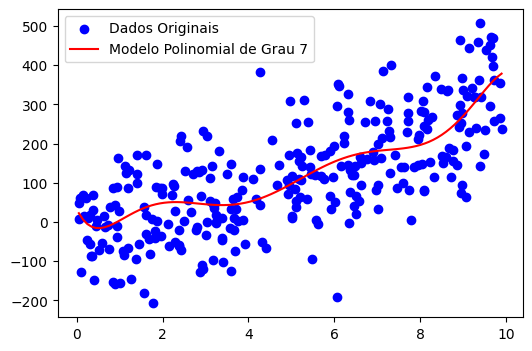

Mean Squared Error (MSE) teste data: 7211.24
Mean Squared Error (MSE) train data: 10202.17
R² Score: 0.5866873605171217


Polinômio de grau:  8


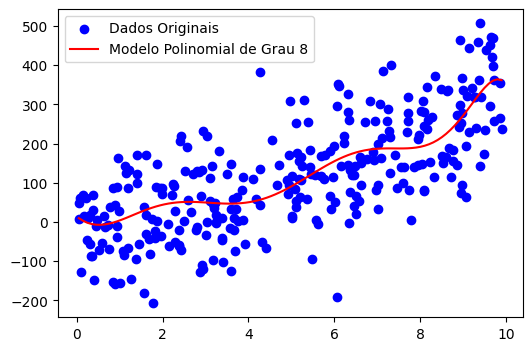

Mean Squared Error (MSE) teste data: 7386.52
Mean Squared Error (MSE) train data: 10178.65
R² Score: 0.5766408915219454


Polinômio de grau:  9


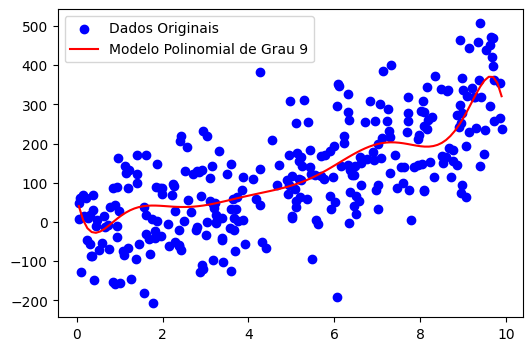

Mean Squared Error (MSE) teste data: 7728.78
Mean Squared Error (MSE) train data: 10043.83
R² Score: 0.5570242176221943


Polinômio de grau:  10


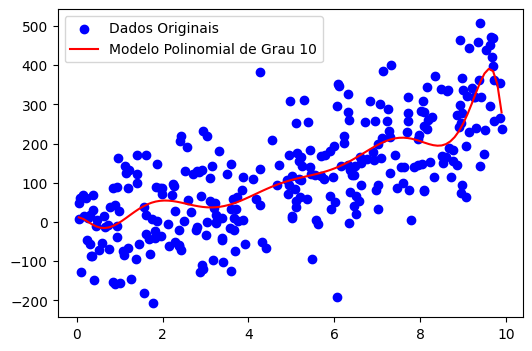

Mean Squared Error (MSE) teste data: 7868.99
Mean Squared Error (MSE) train data: 9901.79
R² Score: 0.548988403715853




In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Criando as features polinomiais
graus = range(1, 11)

for grau in graus:
  print("Polinômio de grau: ", grau)
  poly = PolynomialFeatures(degree=grau)
  X_poly_train = poly.fit_transform(X_train)
  X_poly_test = poly.transform(X_test)

  # Ajustando o modelo
  modelo = LinearRegression()
  modelo.fit(X_poly_train, y_train)

  # Fazendo previsões
  y_pred_train = modelo.predict(X_poly_train)
  y_pred_test = modelo.predict(X_poly_test)

  # Plotar gráfico pra cada modelo
  X_seq = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
  X_seq_poly = poly.transform(X_seq)
  y_seq_poly = modelo.predict(X_seq_poly)
  plt.figure(figsize=(6, 4))
  plt.scatter(X, y, color='blue', label='Dados Originais')
  plt.plot(X_seq, y_seq_poly, color='red', label=f'Modelo Polinomial de Grau {grau}')
  plt.legend()
  plt.show()

  # Métricas
  mse = mean_squared_error(y_test, y_pred_test)
  print(f"Mean Squared Error (MSE) teste data: {mse:.2f}")

  mse_train = mean_squared_error(y_train, y_pred_train)
  print(f"Mean Squared Error (MSE) train data: {mse_train:.2f}")

  r2 = r2_score(y_test, y_pred_test)
  print(f"R² Score: {r2}")
  print("\n")

A partir das métricas acima, é importante lembrarmos que:

O R² é uma medida estatística, de 0 a 1, que indica o quão próximos da linha de regressão estão nossos dados.  
O R² fornece uma medida intuitiva da proporção da variabilidade na variável dependente que é explicada pelo modelo. Quanto mais próximo de 1, melhor o modelo está em explicar a variabilidade.  

MSE: calcula a diferença entre os valores previstos pelo modelo e os valores reais, e eleva o resultado ao quadrado.  

Portanto, quanto maior é o valor de MSE, significa que o modelo não performou bem em relação as previsões.